In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest 
import seaborn as sns
import datetime as dt
from datetime import datetime,tzinfo
from pytz import timezone
import time
import pytz
import csv

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
crypto = pd.read_csv('./crypto-markets.csv')
btc = crypto.loc[crypto['name'] == 'Bitcoin']
btc = btc.drop(['slug', 'market', 'ranknow', 'volume', 'close_ratio', 'spread'], axis = 1)
btc

,symbol,name,date,open,high,low,close
0,BTC,Bitcoin,2013-04-28,135.30,135.98,132.10,134.21
1,BTC,Bitcoin,2013-04-29,134.44,147.49,134.00,144.54
2,BTC,Bitcoin,2013-04-30,144.00,146.93,134.05,139.00
3,BTC,Bitcoin,2013-05-01,139.00,139.89,107.72,116.99
4,BTC,Bitcoin,2013-05-02,116.38,125.60,92.28,105.21
5,BTC,Bitcoin,2013-05-03,106.25,108.13,79.10,97.75
6,BTC,Bitcoin,2013-05-04,98.10,115.00,92.50,112.50
7,BTC,Bitcoin,2013-05-05,112.90,118.80,107.14,115.91
8,BTC,Bitcoin,2013-05-06,115.98,124.66,106.64,112.30
9,BTC,Bitcoin,2013-05-07,112.25,113.44,97.70,111.50


In [3]:
btc.describe()

,open,high,low,close
count,2042.000000,2042.000000,2042.000000,2042.000000
mean,2285.455421,2354.447723,2207.495544,2287.287272
std,3438.652272,3563.970934,3285.670083,3438.366702
min,68.500000,74.560000,65.530000,68.430000
25%,320.590000,329.070000,313.412500,321.135000
50%,598.015000,607.365000,587.275000,598.140000
75%,2607.887500,2749.390000,2536.247500,2608.680000
max,19475.800000,20089.000000,18974.100000,19497.400000


Text(0,0.5,'Price of Bitcoin')

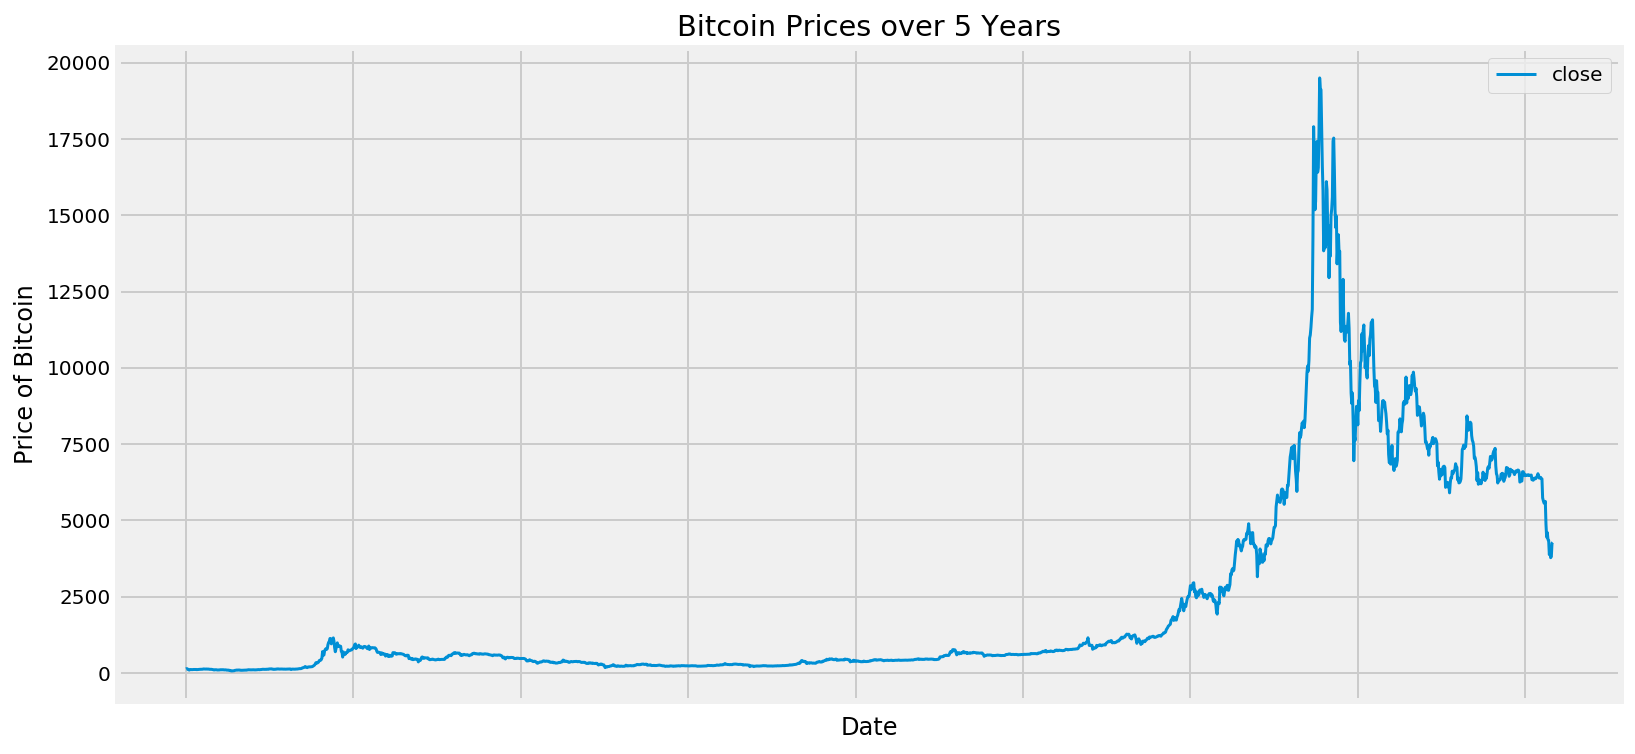

In [4]:
btc.plot(x='date', y='close', figsize=(12,6), linewidth=1.5)
plt.title('Bitcoin Prices over 5 Years')
plt.xlabel('Date')
plt.ylabel('Price of Bitcoin')

## Isolation Forest

In [5]:
data = btc[['close']]
outliers_fraction=0.05
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data) 
btc['anomaly'] = pd.Series(model.predict(data))

In [6]:
btc['anomaly'] = btc['anomaly'].apply(lambda x: x == -1)
btc['anomaly'] = btc['anomaly'].astype(int)
btc['anomaly'].value_counts()

0    1939
1     103
Name: anomaly, dtype: int64

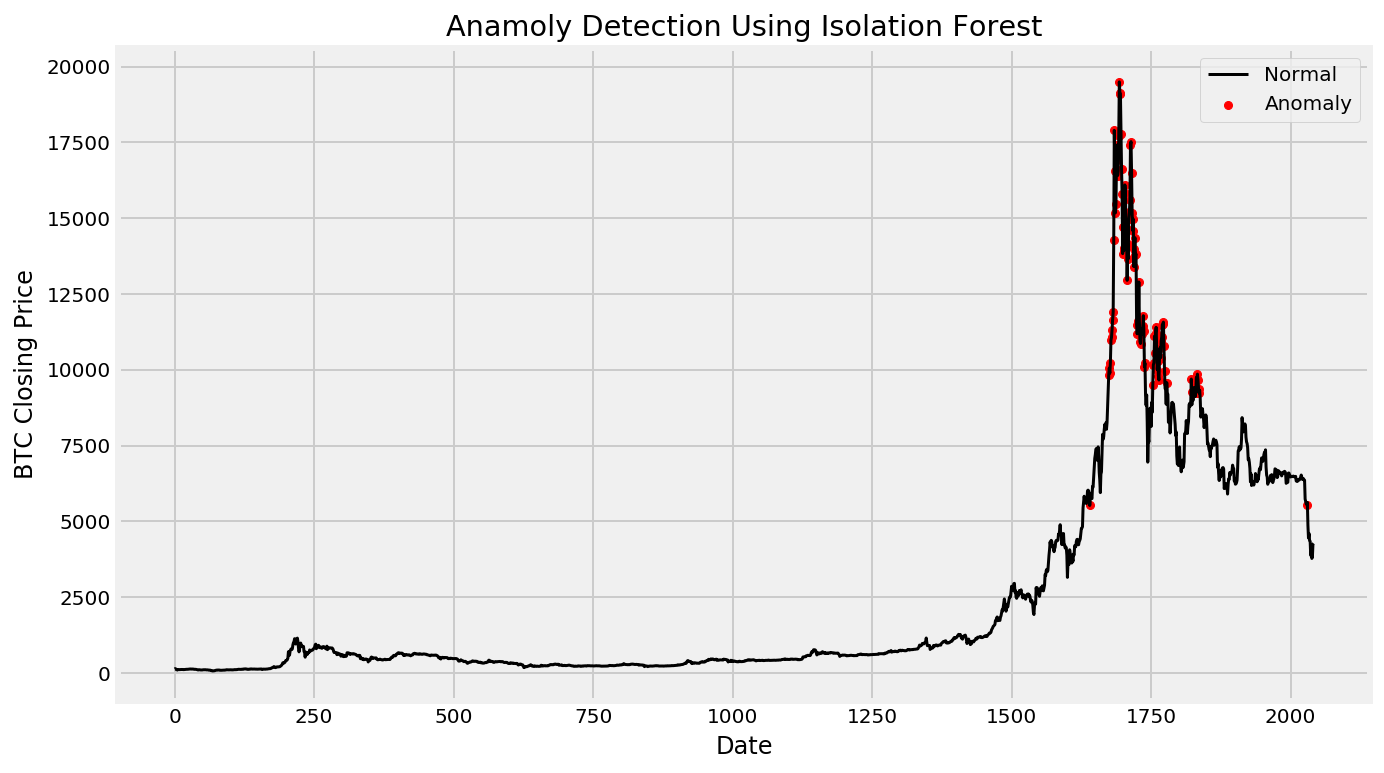

In [7]:
# visualization
fig, ax = plt.subplots(figsize=(10,6))

#anomaly
a = btc.loc[btc['anomaly'] == 1]
ax.plot(btc['close'], color='black', label = 'Normal', linewidth=1.5)
ax.scatter(a.index ,a['close'], color='red', label = 'Anomaly', s=16)
plt.legend()
plt.title("Anamoly Detection Using Isolation Forest")
plt.xlabel('Date')
plt.ylabel('BTC Closing Price')
plt.show();

In [8]:
btc['anomaly'].to_csv('isEvent_IsolationForest.csv')